In [ ]:
!pip install bambi
!pip install watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.2 which is incompatible.


In [ ]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
az.style.use("arviz-darkgrid")
SEED = 7355608

In [1]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['supermarket_sales.csv']))
#data = bmb.load_data("ESCS")
np.round(data.describe(), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data = data.drop(['Invoice ID','Date','Time'], axis = 1)

Dropping variables 'Invoice ID','Date','Time' as they are very weak predictors 

In [ ]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [ ]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_columns:
    data[i]=le.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int64  
 1   City                     1000 non-null   int64  
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(7)
m

In [ ]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3


**Predictor variables are**: <br> 
Branch', 'City', 'Customer type', 'Gender', 'Product line','Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs','gross margin percentage', 'gross income

**Target variables is**: <br> 
Rating

Checking distributions of predictors and correlation among them: 

/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/pairplot.py:242: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  UserWarning,


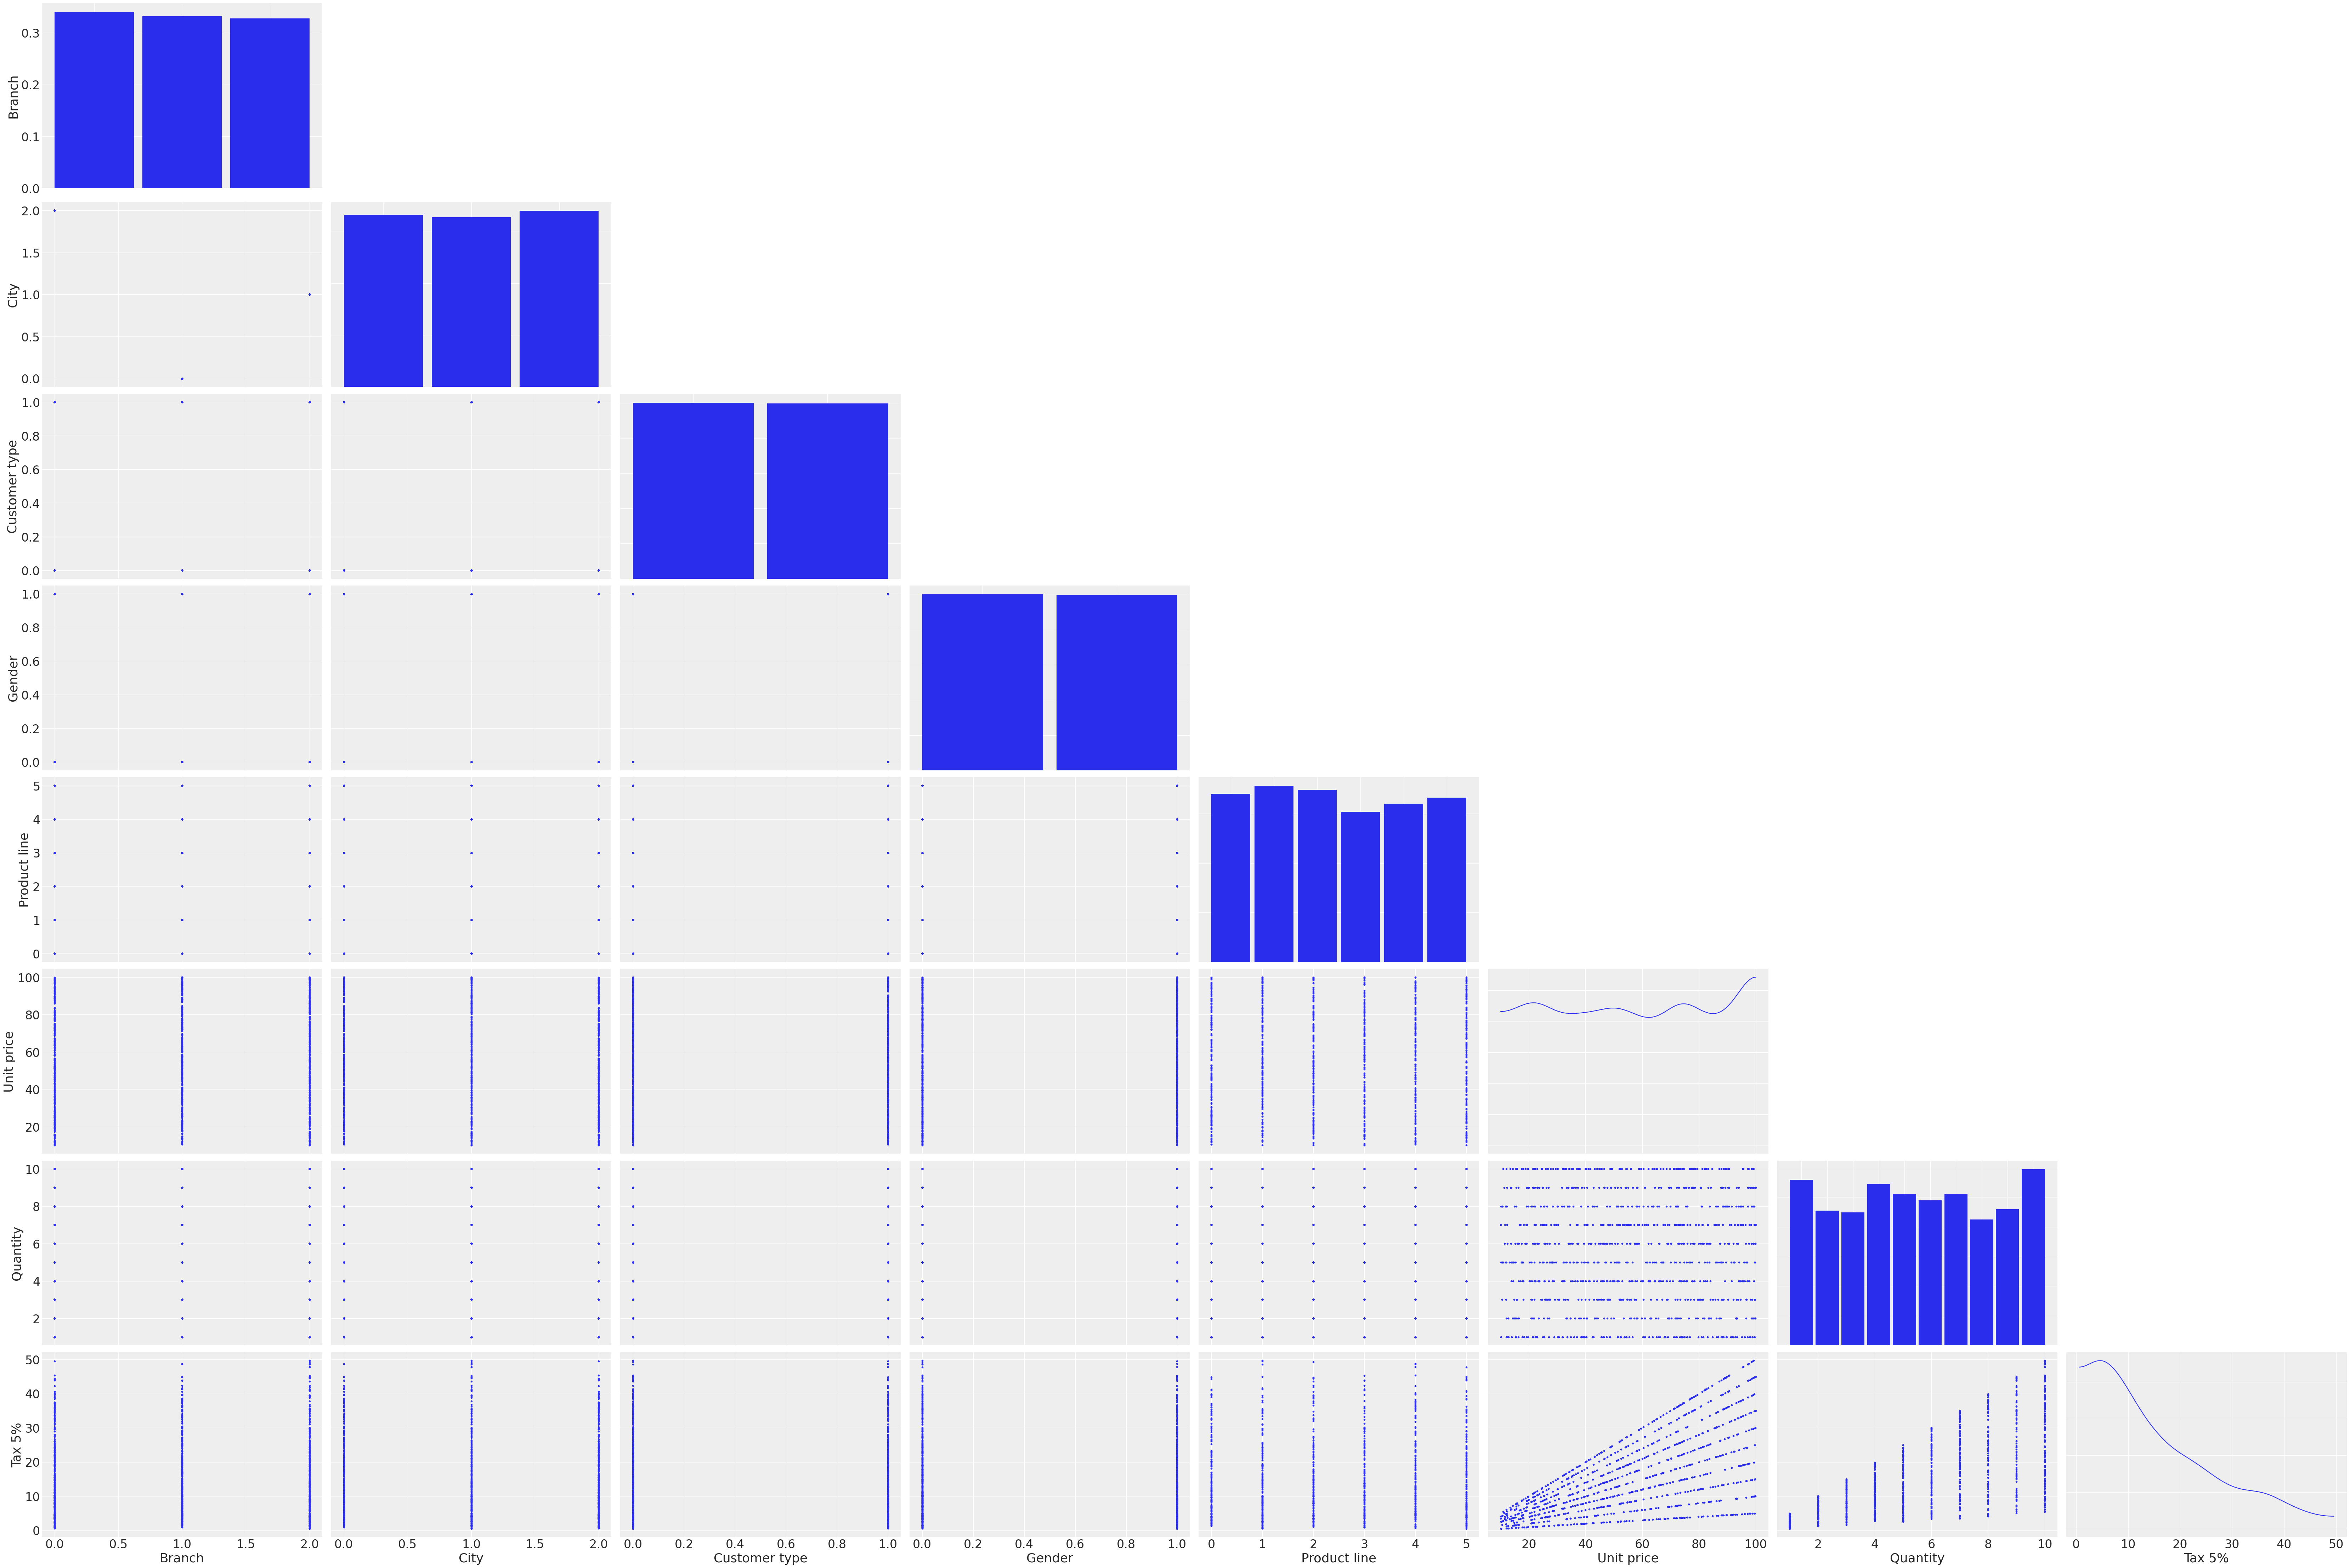

In [ ]:
az.plot_pair(data[['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income']].to_dict("list"), marginals=True, textsize=24);

We can see that some predictors are more or less uniform distributed while asymmetric distribution without outliers and the pairwise correlations between them are not strong in mostly.

Checking distributions of target variable:

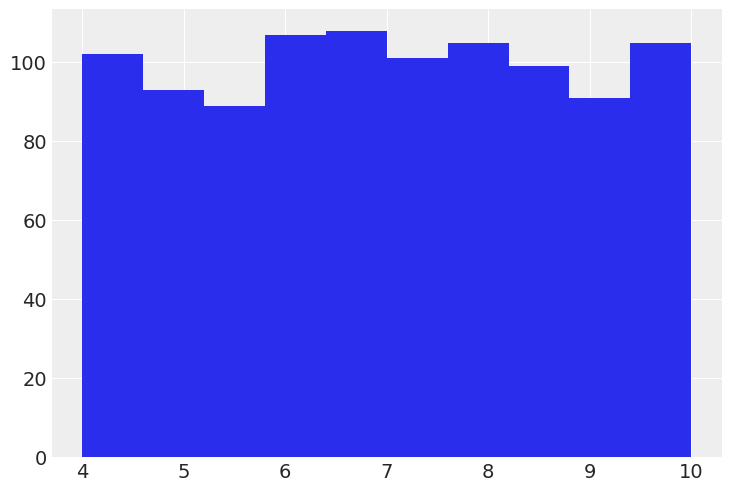

In [ ]:
data["Rating"].hist();

"Rating" has more or less uniform distributed

Rename the variables for our convinence:

In [ ]:
data = data.rename(columns = {'Branch':'IV1', 'City':'IV2', 'Customer type':'IV3', 'Gender':'IV4',
       'Product line':'IV5', 'Unit price':'IV6', 'Quantity':'IV7', 'Tax 5%':'IV8', 'Total':'IV9', 
       'Payment':'IV10', 'cogs':'IV11', 'gross margin percentage':'IV12', 'gross income':'IV13',
       'Rating':'DV'})
data.columns

Index(['IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12', 'IV13', 'DV'],
      dtype='object')

Dividing the data in train and test set: (In 80-20 ratio)

In [ ]:
data_train, data_test = train_test_split(data,random_state=0,test_size=0.2)

In [ ]:
print(len(data_train))
print(len(data_test))

800
200


In [ ]:
#model = bmb.Model("DV ~ IV1 + IV2 + IV3 + IV4 + IV5 + IV6 + IV7 + IV8 + IV9 + IV10 + IV11 + IV12 + IV13", data)
model = bmb.Model("DV ~ IV1 + IV2 + IV3 + IV4 + IV5 + IV6 + IV7 + IV8", data_train)
fitted = model.fit(tune=2000, draws=2000, init="adapt_diag", random_seed=SEED)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [DV_sigma, Intercept, IV8, IV7, IV6, IV5, IV4, IV3, IV2, IV1]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


If no priors are given explicitly by the user, then Bambi chooses smart default priors for all parameters of the model based on the implied partial correlations between the outcome and the predictors

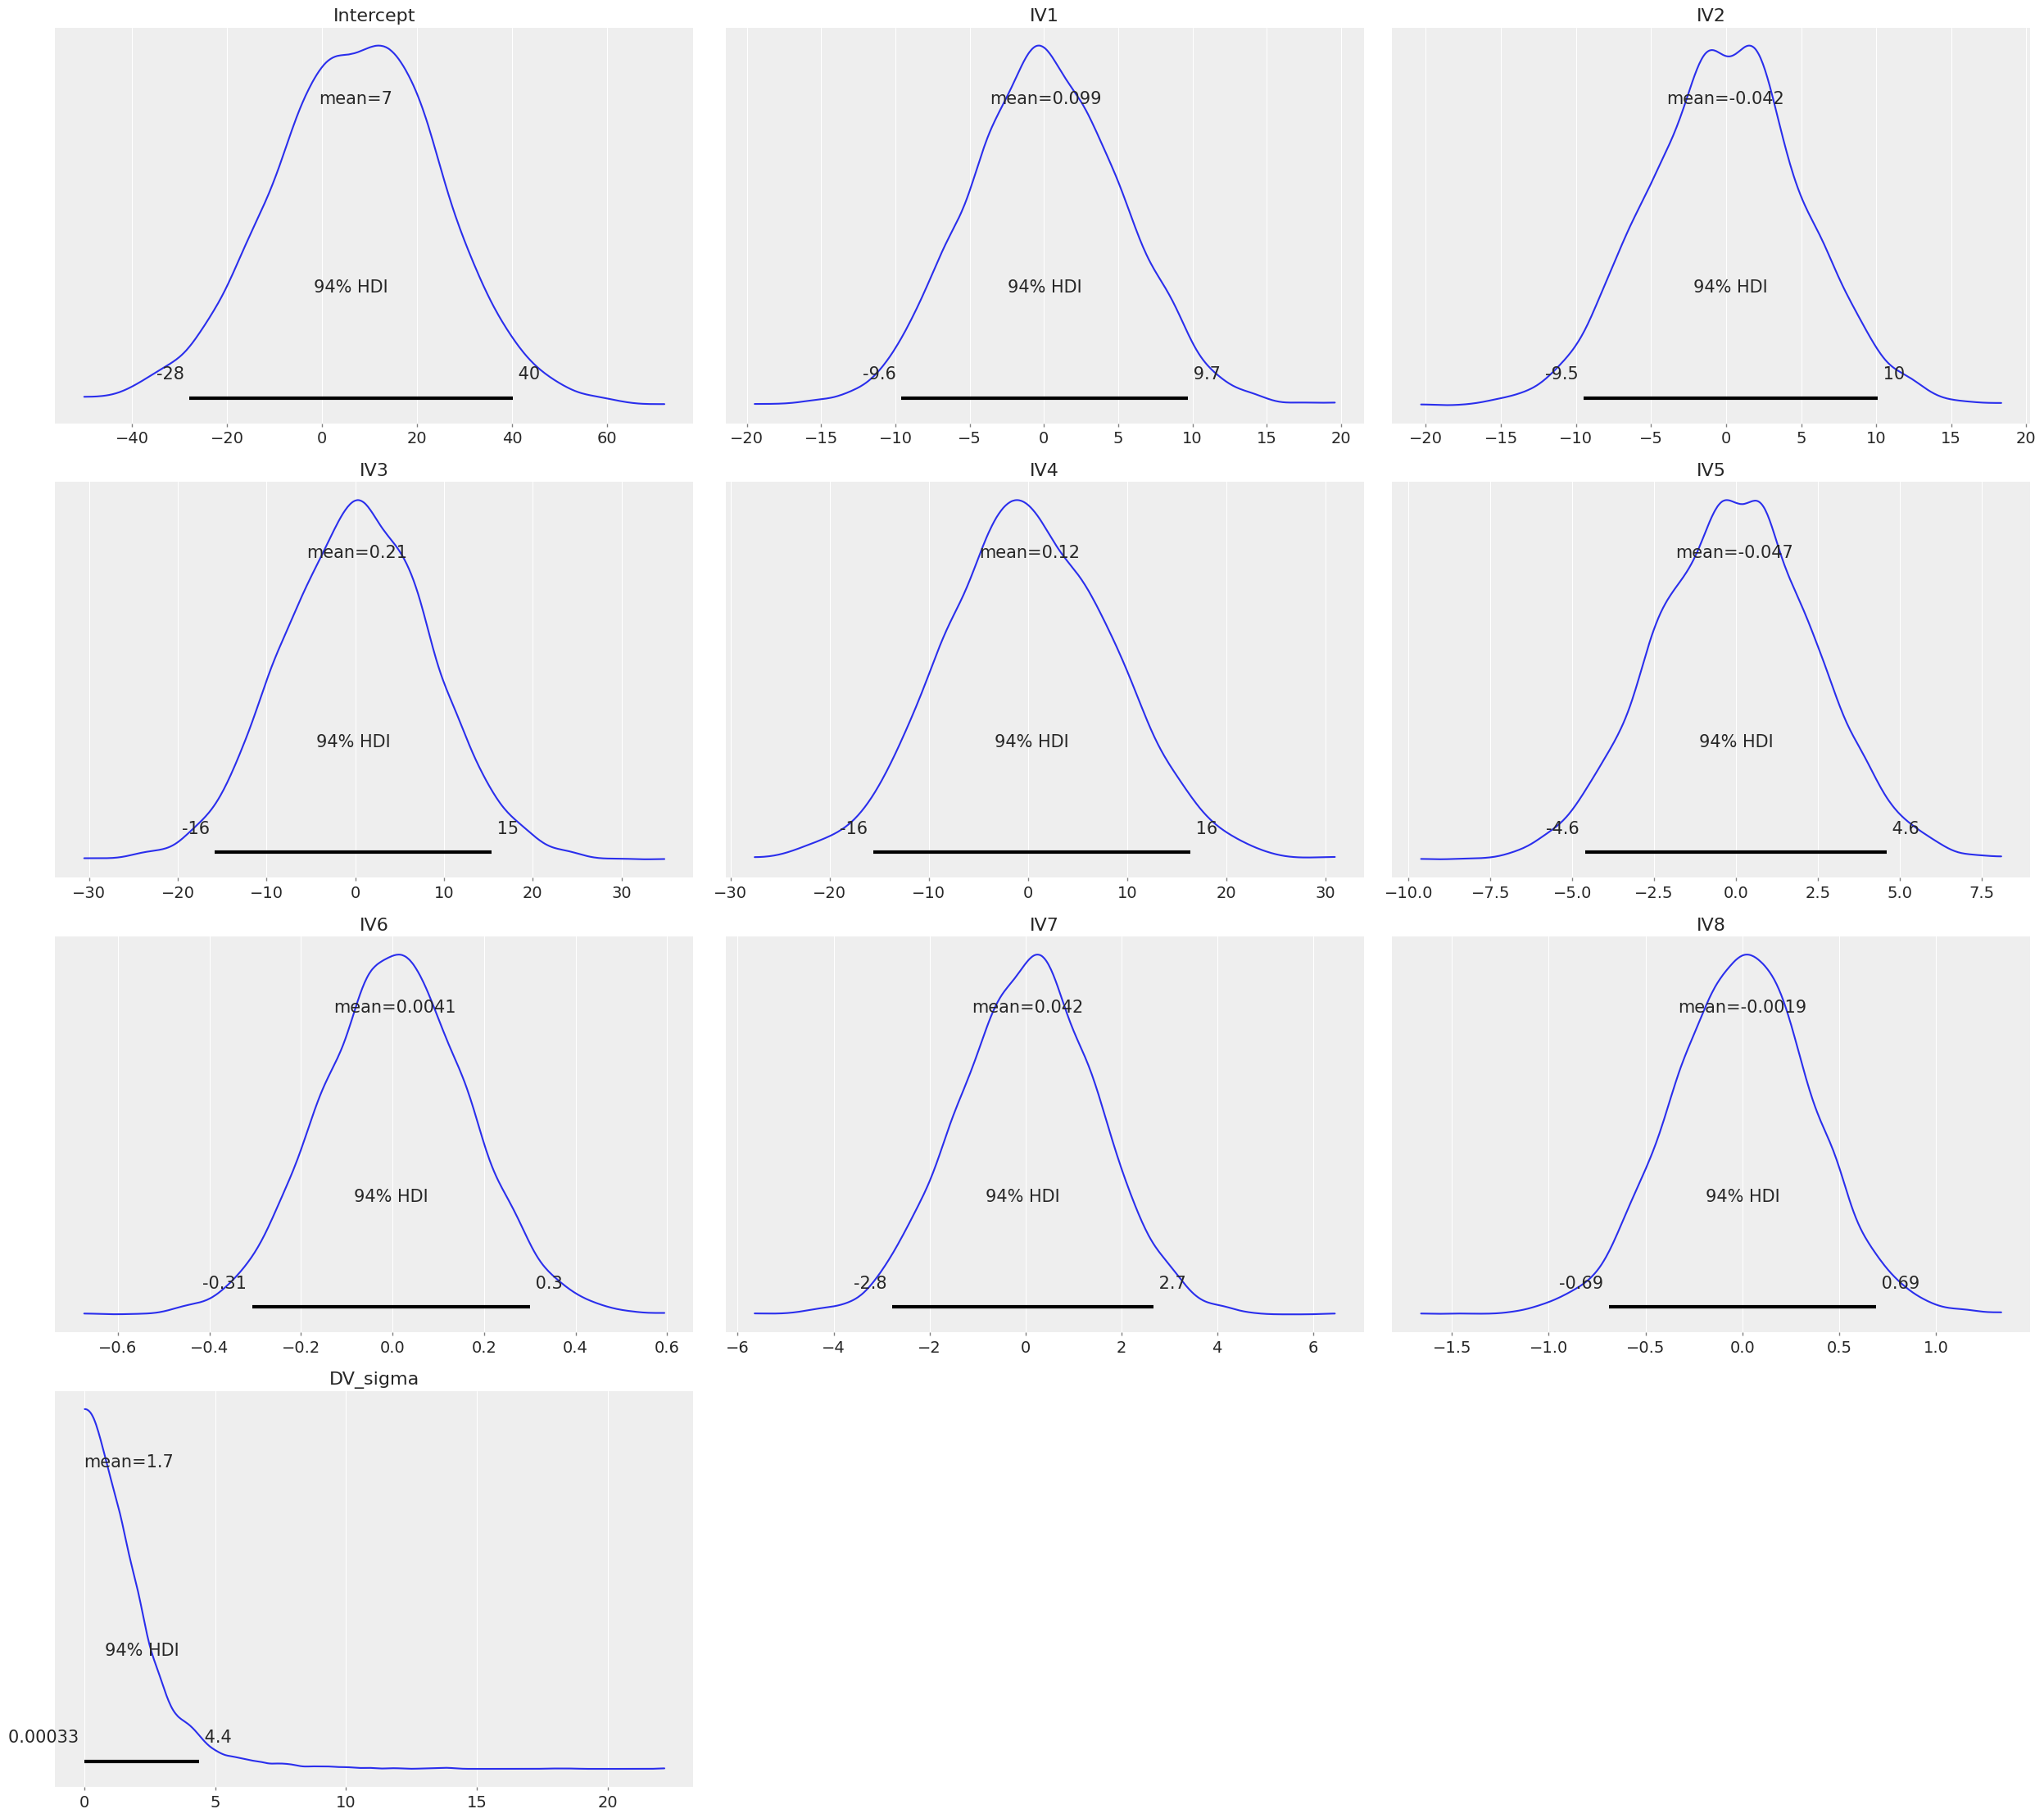

In [ ]:
model.plot_priors();

In [ ]:
# Normal priors on the coefficients
{x.name:x.prior.args for x in model.terms.values()}

{'IV1': {'mu': array(0.), 'sigma': array(5.21498628)},
 'IV2': {'mu': array(0.), 'sigma': array(5.1800702)},
 'IV3': {'mu': array(0.), 'sigma': array(8.51891069)},
 'IV4': {'mu': array(0.), 'sigma': array(8.51883082)},
 'IV5': {'mu': array(0.), 'sigma': array(2.4638553)},
 'IV6': {'mu': array(0.), 'sigma': array(0.16184258)},
 'IV7': {'mu': array(0.), 'sigma': array(1.45117918)},
 'IV8': {'mu': array(0.), 'sigma': array(0.36496045)},
 'Intercept': {'mu': array(7.018), 'sigma': array(17.92754678)}}

In [ ]:
# HalfStudentT prior on the residual standard deviation
model.response.family.likelihood.priors

{'sigma': HalfStudentT(nu: 4, sigma: 1.7038)}

In [ ]:
model

Formula: DV ~ IV1 + IV2 + IV3 + IV4 + IV5 + IV6 + IV7 + IV8
Family name: Gaussian
Link: identity
Observations: 800
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 7.018, sigma: 17.9275)
    IV1 ~ Normal(mu: 0.0, sigma: 5.215)
    IV2 ~ Normal(mu: 0.0, sigma: 5.1801)
    IV3 ~ Normal(mu: 0.0, sigma: 8.5189)
    IV4 ~ Normal(mu: 0.0, sigma: 8.5188)
    IV5 ~ Normal(mu: 0.0, sigma: 2.4639)
    IV6 ~ Normal(mu: 0.0, sigma: 0.1618)
    IV7 ~ Normal(mu: 0.0, sigma: 1.4512)
    IV8 ~ Normal(mu: 0.0, sigma: 0.365)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.7038)


------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

Notice first four independent variables have high S.D and last four independent variables have relatively small S.D's of the slope priors. 

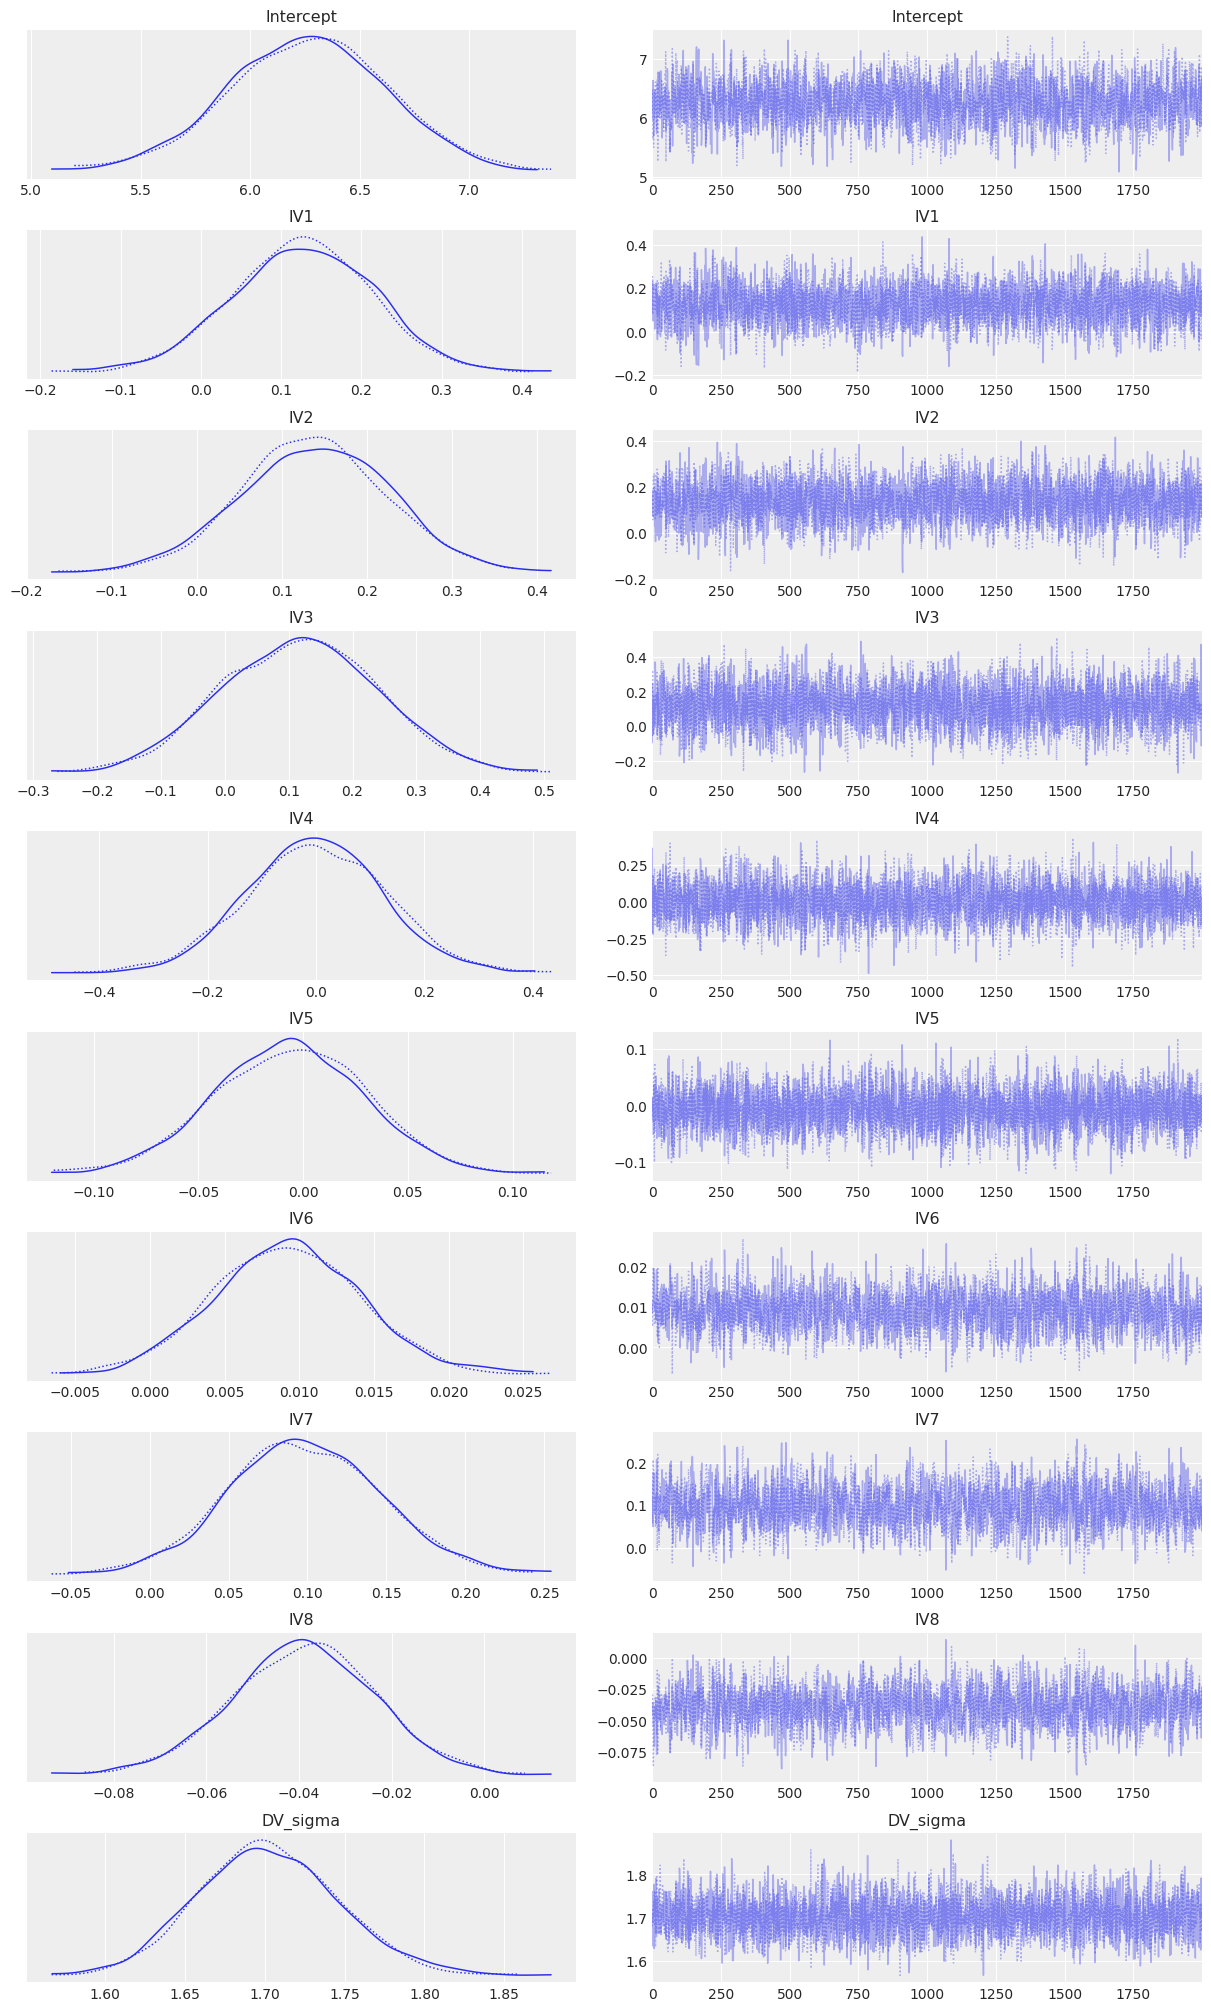

In [ ]:
az.plot_trace(fitted);

The left panels show the marginal posterior distributions for all of the model’s parameters, which summarize the most plausible values of the regression coefficients, given the data we have now observed. These posterior density plots show two overlaid distributions because we ran two MCMC chains. The panels on the right are “trace plots” showing the sampling paths of the two MCMC chains as they wander through the parameter space. If any of these paths exhibited a pattern other than white noise we would be concerned about the convergence of the chains.

The summary of the parameter estimates:

In [ ]:
az.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.260,0.362,5.602,6.970,0.008,0.006,2168.0,2061.0,1.0
IV1,0.126,0.087,-0.028,0.297,0.001,0.001,3488.0,2890.0,1.0
IV2,0.138,0.087,-0.030,0.298,0.001,0.001,3582.0,2993.0,1.0
IV3,0.117,0.121,-0.113,0.338,0.002,0.002,4642.0,3049.0,1.0
IV4,-0.001,0.127,-0.238,0.239,0.002,0.002,5076.0,3289.0,1.0
IV5,-0.007,0.036,-0.072,0.061,0.000,0.001,5417.0,2449.0,1.0
IV6,0.009,0.005,-0.000,0.018,0.000,0.000,1884.0,2202.0,1.0
IV7,0.098,0.048,0.005,0.186,0.001,0.001,1845.0,2179.0,1.0
IV8,-0.039,0.015,-0.067,-0.009,0.000,0.000,1741.0,1978.0,1.0
DV_sigma,1.702,0.043,1.619,1.780,0.001,0.000,4481.0,3267.0,1.0


although in this case it’s pretty clear from the trace plots above that the chains have converged just fine.

In [ ]:
samples = fitted.posterior
samples

<xarray.Dataset>
Dimensions:    (chain: 2, draw: 2000)
Coordinates:
  * chain      (chain) int64 0 1
  * draw       (draw) int64 0 1 2 3 4 5 6 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    Intercept  (chain, draw) float64 6.393 6.36 5.975 ... 6.574 6.869 5.864
    IV1        (chain, draw) float64 0.1562 0.2311 0.09095 ... -0.04011 0.2267
    IV2        (chain, draw) float64 0.07834 0.1854 0.07919 ... 0.07266 0.2477
    IV3        (chain, draw) float64 -0.09662 0.2442 -0.02023 ... 0.1314 0.1196
    IV4        (chain, draw) float64 0.3645 -0.1948 0.1749 ... -0.1003 0.1062
    IV5        (chain, draw) float64 -0.001469 -0.02459 ... -0.04791 0.01743
    IV6        (chain, draw) float64 0.009096 0.008685 ... 0.006089 0.01217
    IV7        (chain, draw) float64 0.0939 0.09538 0.1506 ... 0.05379 0.1011
    IV8        (chain, draw) float64 -0.04307 -0.04596 ... -0.02527 -0.04867
    DV_sigma   (chain, draw) float64 1.65 1.76 1.635 1.664 ... 1.707 1.668 1.733
Attributes:
    created_at:                  2022-01-01T13:47:23.852570
    arviz_version:               0.11.4
    inference_library:           pymc3
    inference_library_version:   3.11.4
    sampling_time:               46.87255835533142
    tuning_steps:                2000
    modeling_interface:          bambi
    modeling_interface_version:  0.6.3

In [ ]:
# the names of the predictors
varnames = ['IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8']

# compute the needed statistics like R-squared when each predictor is response and all the
# other predictors are the predictor

# x_matrix = common effects design matrix (excluding intercept/constant term)
terms = [t for t in model.common_terms.values() if t.name != "Intercept"]
x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
x_matrix = pd.concat(x_matrix, axis=1)

dm_statistics = {
    'r2_x': pd.Series(
        {
            x: sm.OLS(
                endog=x_matrix[x],
                exog=sm.add_constant(x_matrix.drop(x, axis=1))
                if "Intercept" in model.term_names
                else x_matrix.drop(x, axis=1),
            )
            .fit()
            .rsquared
            for x in list(x_matrix.columns)
        }
    ),
    'sigma_x': x_matrix.std(),
    'mean_x': x_matrix.mean(axis=0),
}

r2_x = dm_statistics['r2_x']
sd_x = dm_statistics['sigma_x']
r2_y = pd.Series([sm.OLS(endog=data['DV'],
                         exog=sm.add_constant(data[[p for p in varnames if p != x]])).fit().rsquared
                  for x in varnames], index=varnames)
sd_y = data['DV'].std()

# compute the products to multiply each slope with to produce the partial correlations
slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
slope_constant

IV1    0.408134
IV2    0.412071
IV3    0.291415
IV4    0.290482
IV5    1.008661
IV6    7.198041
IV7    0.733864
IV8    2.264434
dtype: float64

In [ ]:
# We also stack draws and chains into samples.
# This will be useful for the following plots
pcorr_samples = (samples[varnames] * slope_constant).stack(samples=("draw", "chain"))

In above lines We just multiply each sampled regression coefficient by its corresponding slope_constant to transform it into a sample partial correlation coefficient.

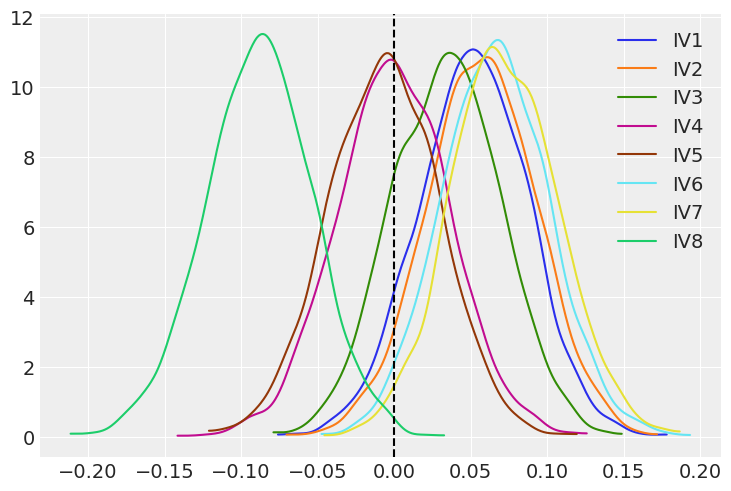

In [ ]:
# Pass the same axes to az.plot_kde to have all the densities in the same plot
_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_kde(v.values, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.axvline(x=0, color='k', linestyle='--');

The means of these distributions serve as good point estimates of the partial correlations:

In [ ]:
pcorr_samples.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    IV1      float64 0.05161
    IV2      float64 0.05678
    IV3      float64 0.0342
    IV4      float64 -0.0003828
    IV5      float64 -0.006689
    IV6      float64 0.06616
    IV7      float64 0.07218
    IV8      float64 -0.08859

Checking which predictors have the strongest effects, defined in terms of squared partial correlation:

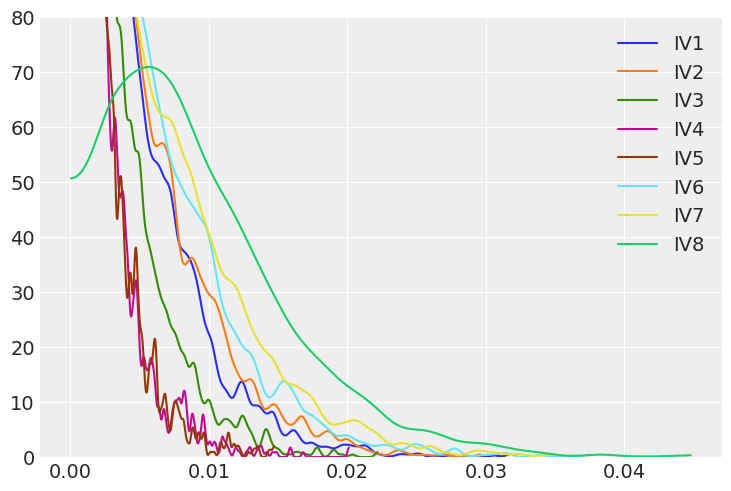

In [ ]:
_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_kde(v.values ** 2, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.set_ylim(0, 80);

Checking for each predictor, what is the probability that it has the largest squared partial correlation:

In [ ]:
pc_df = pcorr_samples.to_dataframe()
(pc_df**2).idxmax(axis=1).value_counts() / len(pc_df.index)

IV8    0.47425
IV2    0.16225
IV1    0.11425
IV7    0.08275
IV3    0.06800
IV6    0.04700
IV4    0.02900
IV5    0.02250
dtype: float64

Here it is clear that 'IV8' (which is actually is 'Tax 5%') is clearly the strongest predictor of 'DV' (which is actually is 'Rating') among all predictors

Seperating x and y in test set:

In [ ]:
y_test = data_test['DV'] #Rating
x_test = data_test.drop('DV',axis=1)

Since we have computed the posterior distribution, we can use it to compute the posterior predictive distribution:

In [ ]:
posterior_predictive = model.predict(fitted, kind="pps", data=x_test) 
fitted

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> posterior_predictive

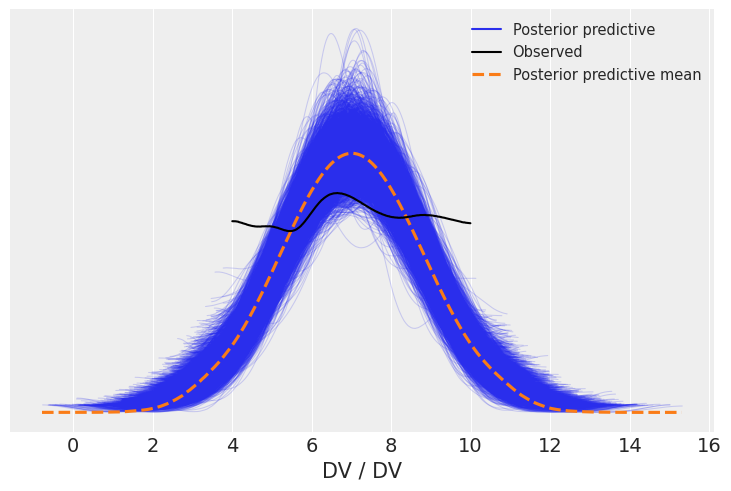

In [ ]:
#az.plot_ppc(fitted_hier_glm);
az.plot_ppc(fitted);

One use of the posterior predictive is as a diagnostic tool: <br> Our posterior predictions seems perform an adequately good job in region 5.5 to 9 i.e. our major region <br>
But posterior predictions in region below 5.5 and above 9 seems to be diverging from the observed data.

Further we are calaculating MSE on test set:

In [ ]:
y_pred = fitted['posterior_predictive']['DV'].values.mean(axis=0).mean(axis=0)
mse = sum((y_test.values - y_pred)**2)/len(y_test.values)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.1985660761844255


As we can see our MSE is quite low, which is a good indicator.

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat Jan 01 2022

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

arviz      : 0.11.4
IPython    : 5.5.0
matplotlib : 3.2.2
pandas     : 1.1.5
google     : 2.0.3
statsmodels: 0.10.2
bambi      : 0.6.3
numpy      : 1.19.5

Watermark: 2.2.0

